In [4]:
from MieSppForce import  green_func, frenel, dipoles, force
from MieSppForce.directivity import get_directivity
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.integrate import quad

In [5]:
c_const = 299792458
eps0_const = 1/(4*np.pi*c_const**2)*1e7
mu0_const = 4*np.pi * 1e-7

    

In [6]:
eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')
# eps_Ag = frenel.get_interpolate('Ag')
# eps_Si = 3

#eps_Si = 3
R = 120
dist = 2
a_angle =np.pi/2
phase = 0

point = [0,0,dist+R]

In [7]:

STOP=45

wls=np.linspace(600,1100,60)
angles = np.linspace(1*np.pi/180, 65*np.pi/180, 60)

F_x = np.empty((len(wls),len(angles), 8))
F_y = np.empty_like(F_x)
F_z = np.empty_like(F_x)

P,M = np.empty((len(wls),len(angles),3), dtype=complex),np.empty((len(wls),len(angles),3), dtype=complex)



for i in tqdm(range(len(wls))):
    for j in range(len(angles)):
        f =  force.F(wls[i], eps_Au, point, R, eps_Si, angles[j],amplitude=1,phase=phase,a_angle=a_angle, stop=STOP, full_output=True)
        F_x[i,j,:] = f[0]
        F_y[i,j,:] = f[1]
        F_z[i,j,:] = f[2]
        p,m = dipoles.calc_dipoles_v2(wls[i], eps_Au, point, R, eps_Si, angles[j], amplitude=1, phase=phase, a_angle=a_angle, stop=STOP)

        p,m = p[:,0],m[:,0]
        P[i,j,:],M[i,j,:]=p,m


 20%|██        | 12/60 [00:27<01:50,  2.30s/it]c:\Users\borod\Desktop\SPP_ANALYTICAL\SPP_ANALYTICAL\.venv\Lib\site-packages\scipy\integrate\_quadpack_py.py:441: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
 33%|███▎      | 20/60 [00:46<01:33,  2.34s/it]c:\Users\borod\Desktop\SPP_ANALYTICAL\SPP_ANALYTICAL\.venv\Lib\site-packages\scipy\integrate\_quadpack_py.py:444: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  im_retval = quad(imfunc, a, b, args, full_output, epsabs,
100%|██████████| 60/60 [02:20<00:00,  2.34s/it]


In [2]:
directivity = np.empty((len(wls),len(angles),4))

for i in tqdm(range(len(wls))):
    for j in range(len(angles)):
        D = get_directivity(wls[i], P[i,j,:], M[i,j,:], eps_Au)
        directivity[i, j, 0] = D(0)
        directivity[i, j, 1] = D(np.pi)
        directivity[i, j, 2] = D(np.pi/2)
        directivity[i, j, 3] = D(3*np.pi/2)

NameError: name 'np' is not defined

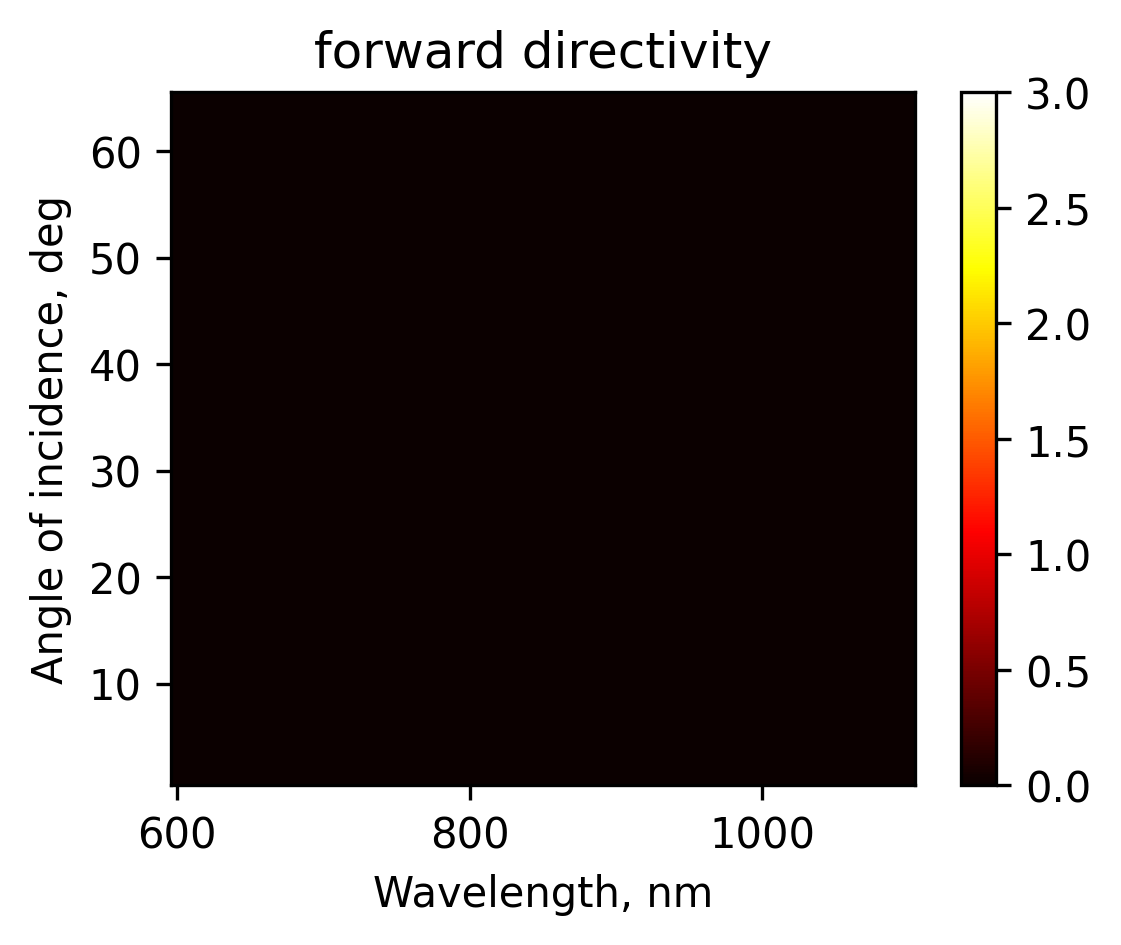

In [10]:

WLS, ANGLES = np.meshgrid(wls, angles, indexing='ij')  

# Plotting the heatmap
plt.figure(figsize=(4, 3), dpi=300)
contour = plt.pcolormesh(WLS, ANGLES*180/np.pi, directivity[:,:,0], cmap='hot', vmin=0, vmax=3)
plt.colorbar(contour)
plt.title('forward directivity')
plt.ylabel('Angle of incidence, deg')
plt.xlabel('Wavelength, nm')

plt.show()

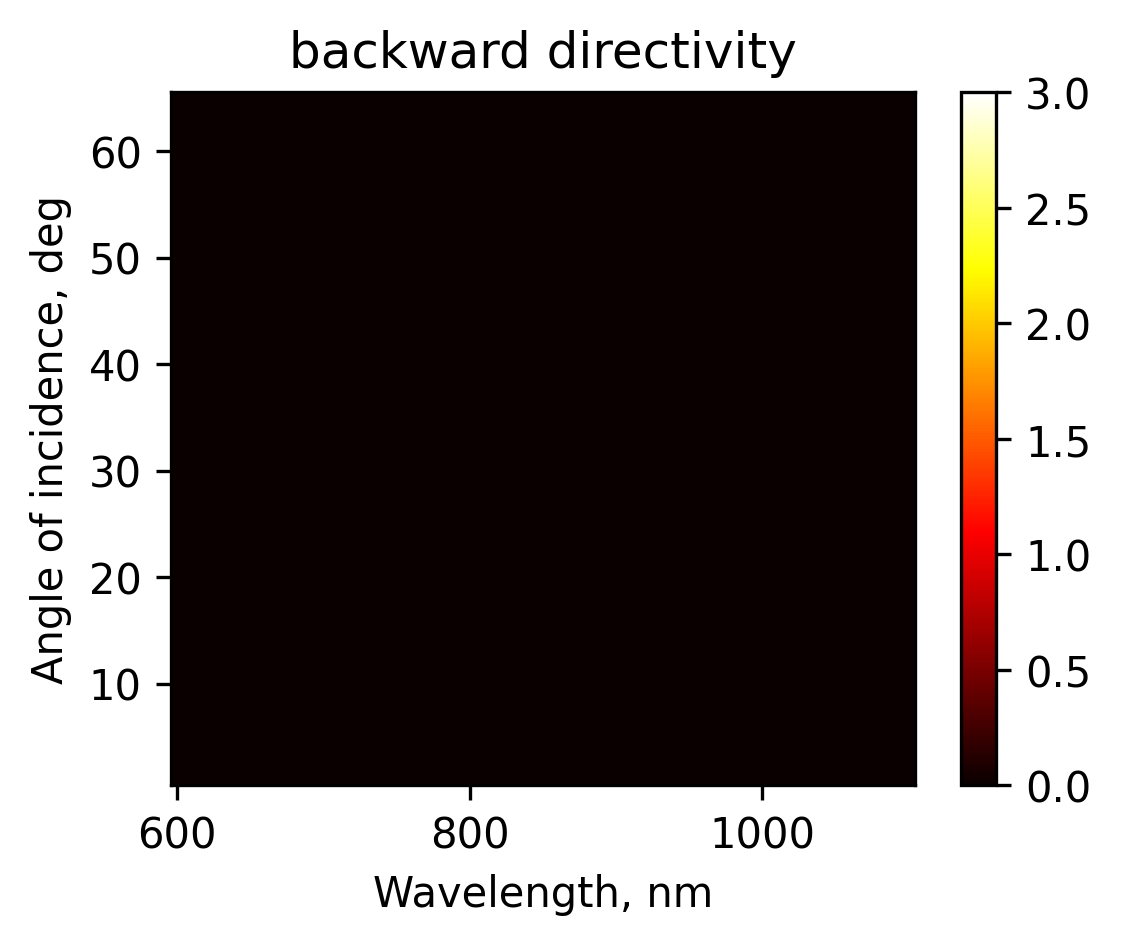

: 

In [ ]:
WLS, ANGLES = np.meshgrid(wls, angles, indexing='ij')  

# Plotting the heatmap
plt.figure(figsize=(4, 3), dpi=300)
contour = plt.pcolormesh(WLS, ANGLES*180/np.pi, directivity[:,:,1], cmap='hot', vmin=0, vmax=3)
plt.colorbar(contour)
plt.title('backward directivity')
plt.ylabel('Angle of incidence, deg')
plt.xlabel('Wavelength, nm')

plt.show()

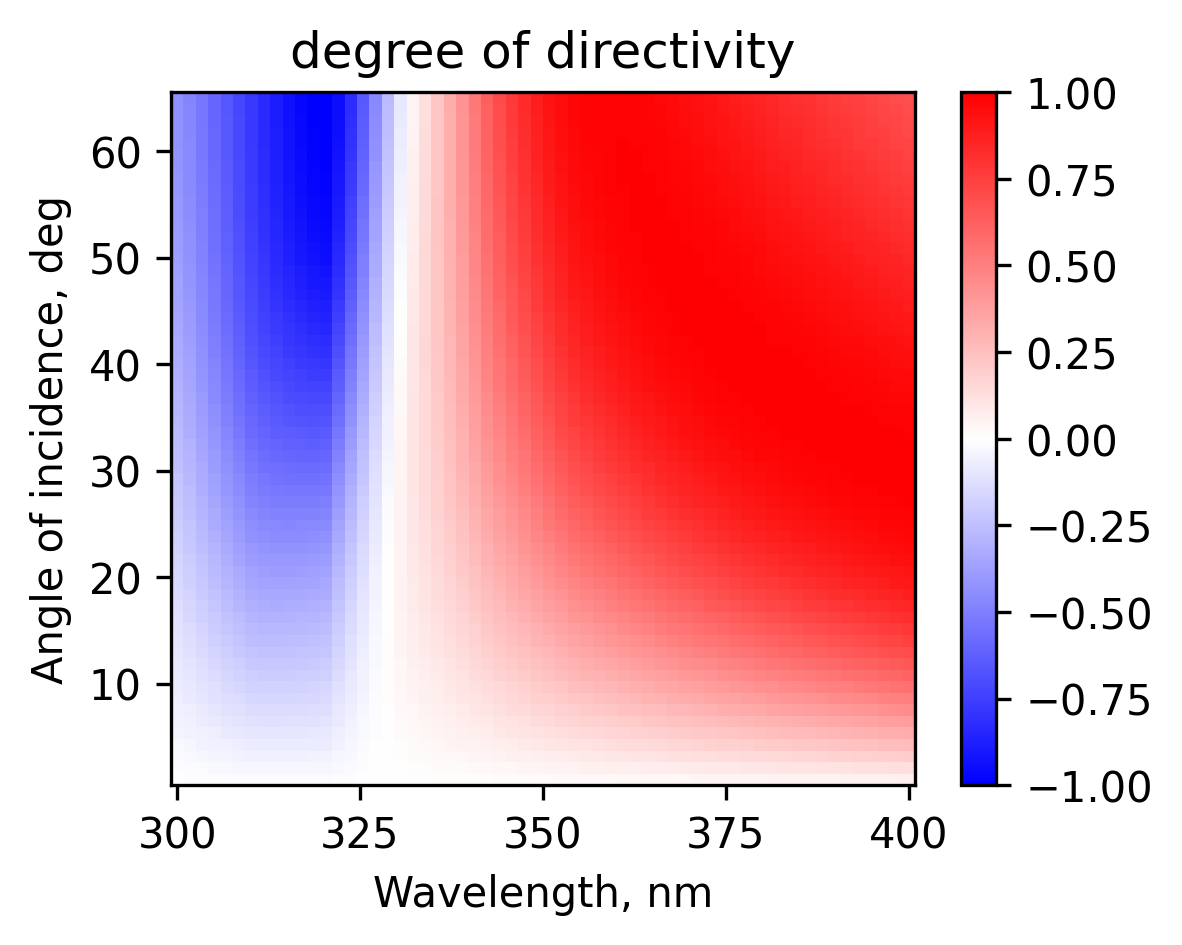

In [32]:
WLS, ANGLES = np.meshgrid(wls, angles, indexing='ij')  

# Plotting the heatmap
plt.figure(figsize=(4, 3), dpi=300)
contour = plt.pcolormesh(WLS, ANGLES*180/np.pi, (directivity[:,:,0]-directivity[:,:,1])/(directivity[:,:,0]+directivity[:,:,1]), cmap='bwr', vmin=-1, vmax=1)
plt.colorbar(contour)
plt.title('degree of directivity')
plt.ylabel('Angle of incidence, deg')
plt.xlabel('Wavelength, nm')

plt.show()

In [18]:
fmax_wls = 0
for i in range(len(wls)):
    f0 = force.F(wls[i], 1, [0,0,0], R, eps_Si, 0,amplitude=1,phase=0,a_angle=0, stop=STOP, full_output=False)[2]
    f0 = np.abs(f0)
    if f0 > fmax_wls:
        fmax_wls = f0

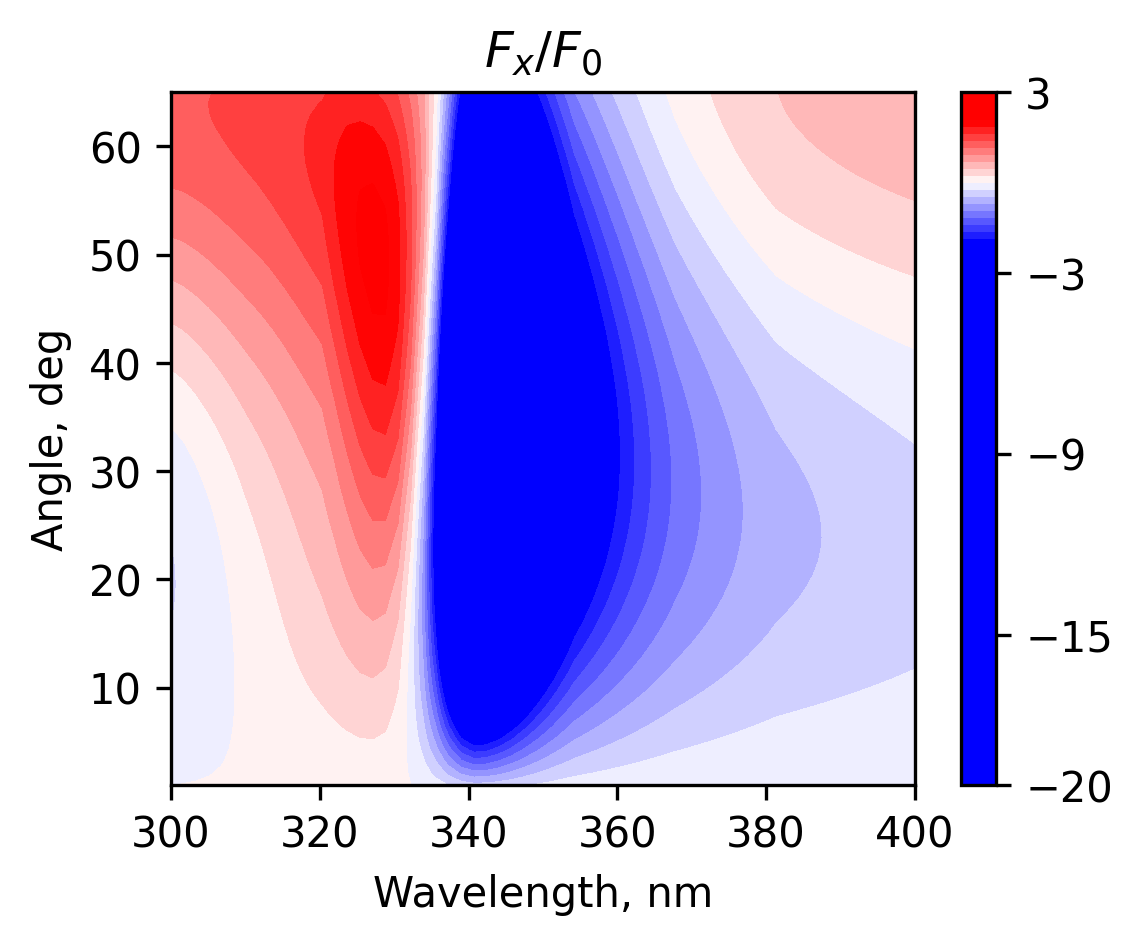

In [29]:
F_x_e0 = F_x[:, :, 1]
F_x_m0 = F_x[:, :, 4]
F_x_pp = F_x[:, :, 2]  
F_x_mm = F_x[:, :, 5]  
F_x_pm = F_x[:, :, 3]  
F_x_mp = F_x[:, :, 6]  
F_x_times = F_x[:, :, 7]

# Create a meshgrid for plotting
WLS, ANGLES = np.meshgrid(wls, angles, indexing='ij')  

# Plotting the heatmap
plt.figure(figsize=(4, 3), dpi=300)
levels=np.linspace(-20,3,100)
contour = plt.contourf(WLS, ANGLES*180/np.pi, (F_x[:,:,0])/fmax_wls,levels, cmap='bwr', vmax=2, vmin=-2)
# contour = plt.pcolormesh(WLS, ANGLES*180/np.pi, (F_x_e0+F_x_pp)/fmax_wls, cmap='bwr', vmax=5, vmin=-5)
#contour = plt.pcolormesh(WLS, ANGLES*180/np.pi, (F_x_pm+F_x_mp+F_x_times)/fmax_wls, cmap='bwr', vmax=0.01, vmin=-0.01)
#contour = plt.pcolormesh(WLS, ANGLES*180/np.pi, (F_x_e0)/fmax_wls, cmap='bwr')
bar = plt.colorbar(contour)
bar.ax.set_yticks(np.linspace(-20,3,5, dtype=int))
plt.ylabel('Angle, deg')
plt.xlabel('Wavelength, nm')
plt.title(r'$F_x/F_0$')

plt.show()

Text(0.5, 1.0, 'arg(px*pz)')

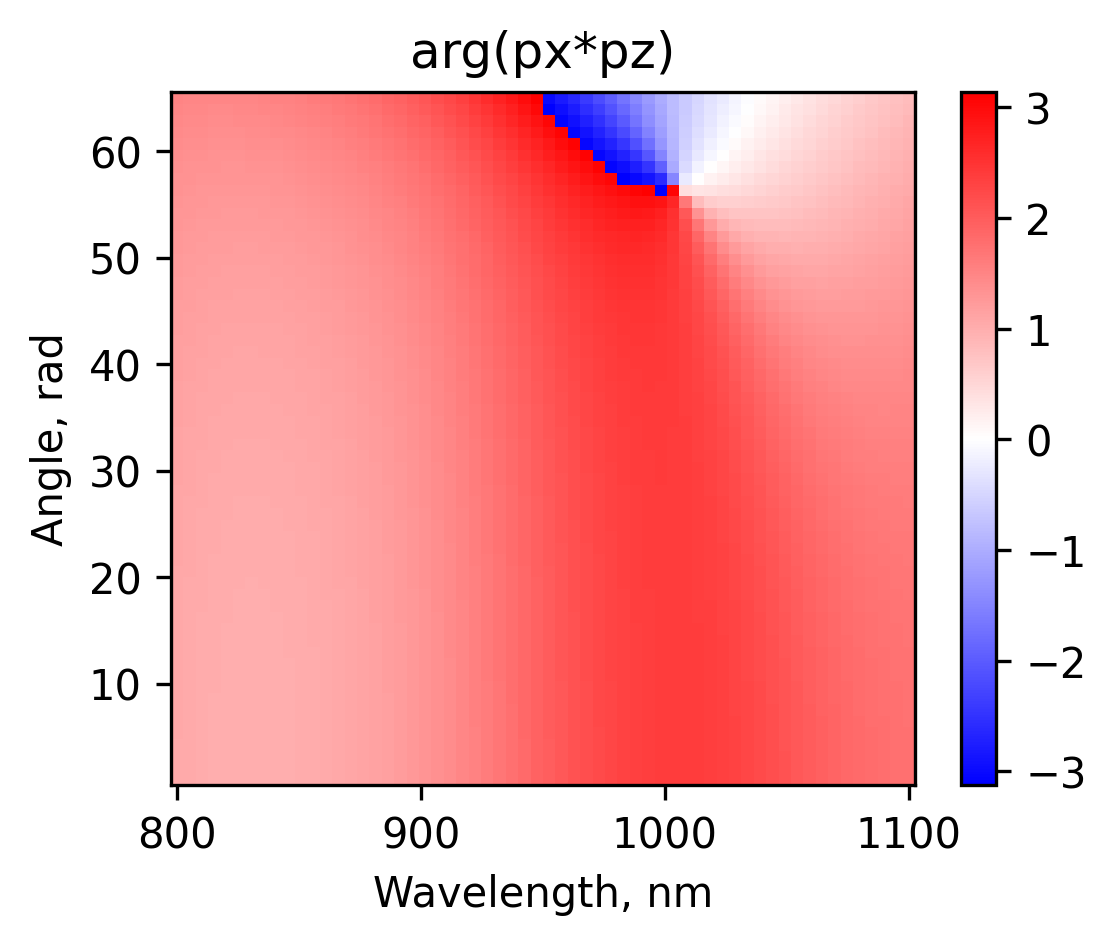

In [73]:


# Create a meshgrid for plotting
WLS, ANGLES = np.meshgrid(wls, angles, indexing='ij')  

# Plotting the heatmap
plt.figure(figsize=(4, 3), dpi=300)
# levels=np.linspace(-20,3,100)
# contour = plt.contourf(WLS, ANGLES*180/np.pi, (F_x[:,:,0])/fmax_wls,levels, cmap='bwr', vmax=5, vmin=-5)
contour = plt.pcolormesh(WLS, ANGLES*180/np.pi, np.angle(P[:,:,0].conj() * P[:,:,2]), cmap='bwr')
#contour = plt.pcolormesh(WLS, ANGLES*180/np.pi, (F_x_pm+F_x_mp+F_x_times)/fmax_wls, cmap='bwr', vmax=0.01, vmin=-0.01)
#contour = plt.pcolormesh(WLS, ANGLES*180/np.pi, (F_x_e0)/fmax_wls, cmap='bwr')
plt.colorbar(contour)
plt.ylabel('Angle, rad')
plt.xlabel('Wavelength, nm')
plt.title('arg(px*pz)')

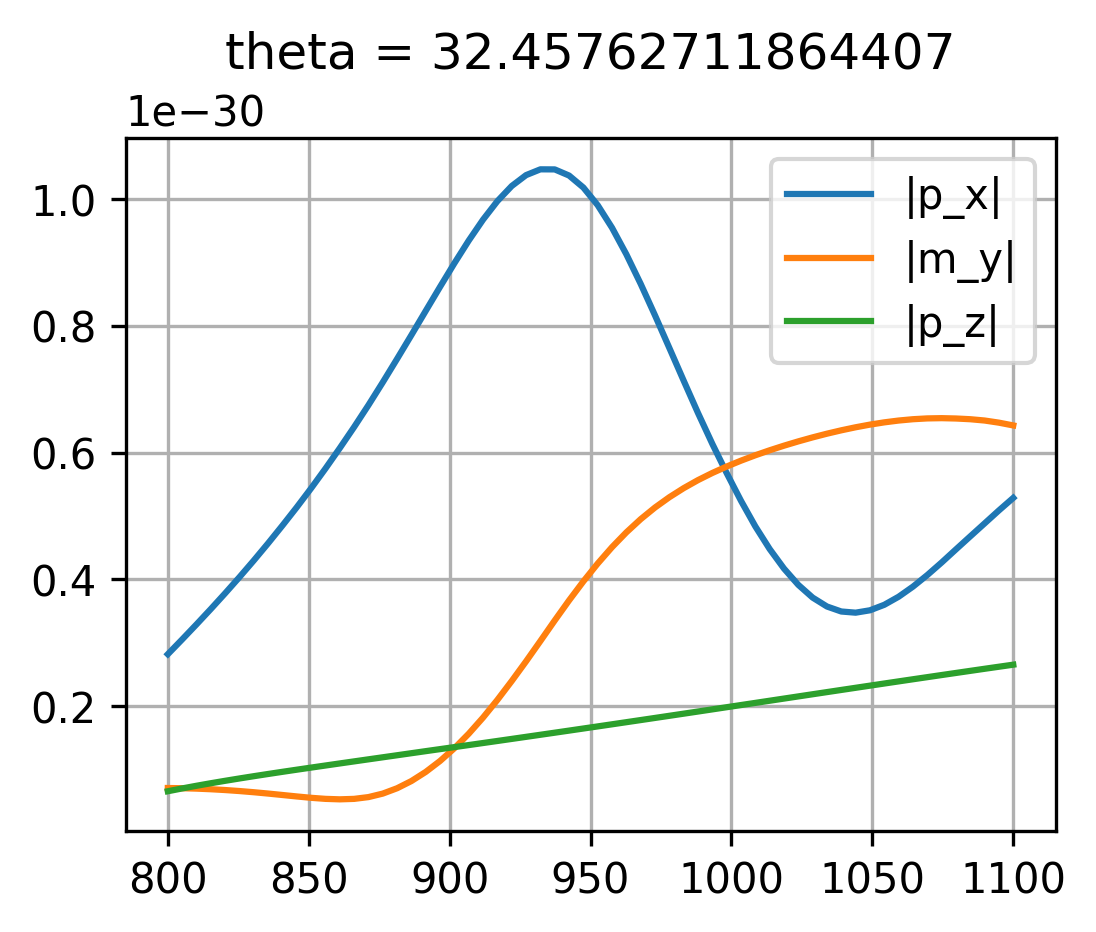

In [44]:
ind = 29
plt.figure(figsize=(4,3), dpi=300)
plt.title(f'theta = {angles[ind]*180/np.pi}')
plt.plot(wls, np.abs(P[:,ind,0]), label='|p_x|')
plt.plot(wls, np.abs(M[:,ind,1])/c_const, label='|m_y|')
plt.plot(wls, np.abs(P[:,ind,2]), label='|p_z|')
plt.grid()
plt.legend()

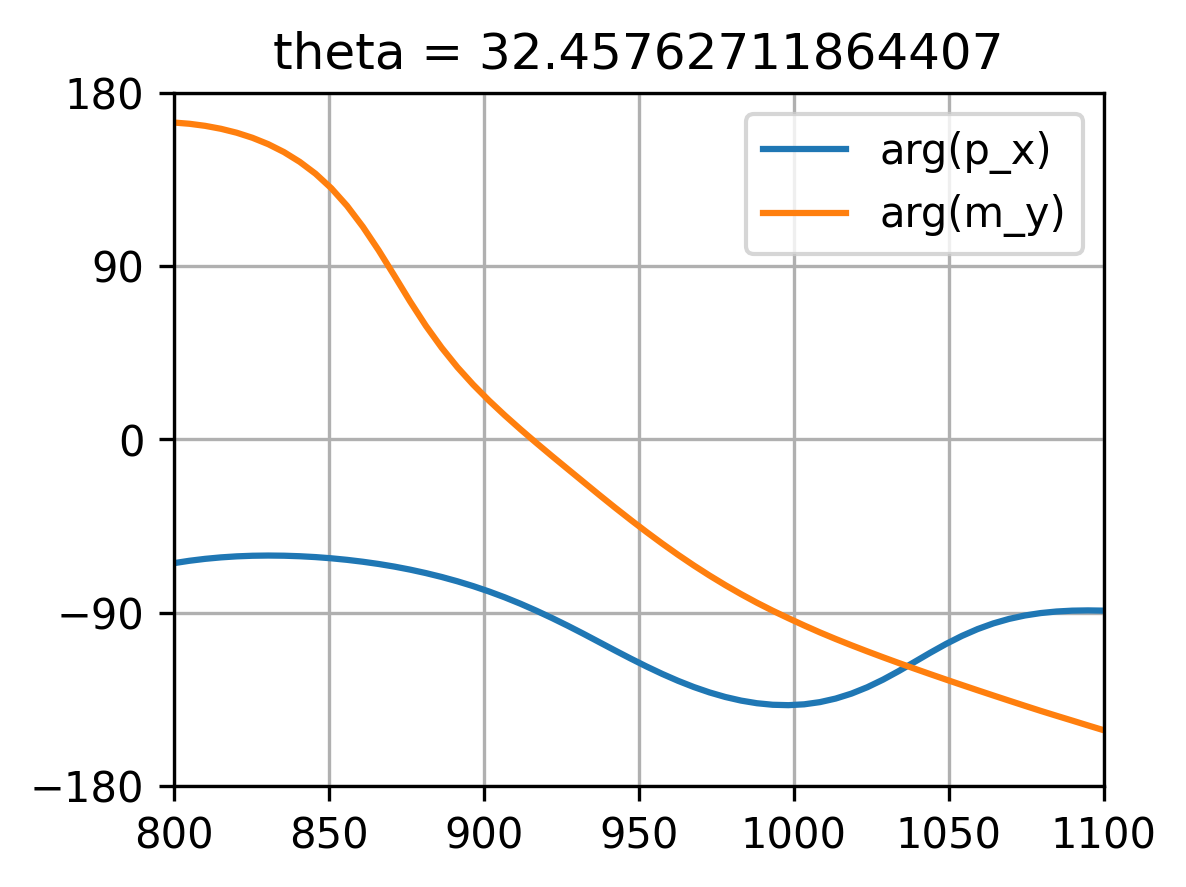

In [42]:
ind = 29
plt.figure(figsize=(4,3), dpi=300)
plt.title(f'theta = {angles[ind]*180/np.pi}')
plt.plot(wls, (np.angle(P[:,ind,0])- np.angle(P[:,ind,2]) )*180/np.pi, label='arg(p_x)')
plt.plot(wls, (np.unwrap(np.angle(M[:,ind,1])) +2*np.pi- np.angle(P[:,ind,2]))*180/np.pi, label='arg(m_y)')
plt.ylim(-180,180)
plt.yticks([-180,-90,0,90,180])
plt.xlim(wls[0], wls[-1])
plt.grid()
plt.legend()

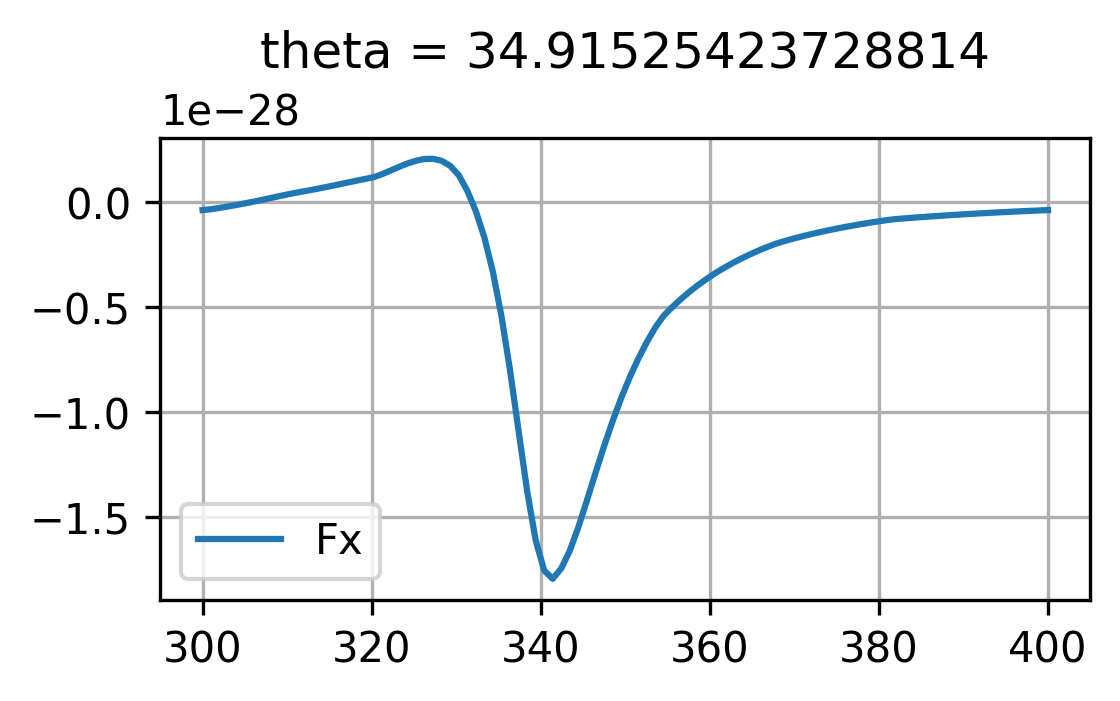

In [20]:
ind = 29
plt.figure(figsize=(4,2), dpi=300)
plt.title(f'theta = {angles[ind]*180/np.pi}')
plt.plot(wls, F_x[:,ind,0], label='Fx')
plt.grid()
plt.legend()

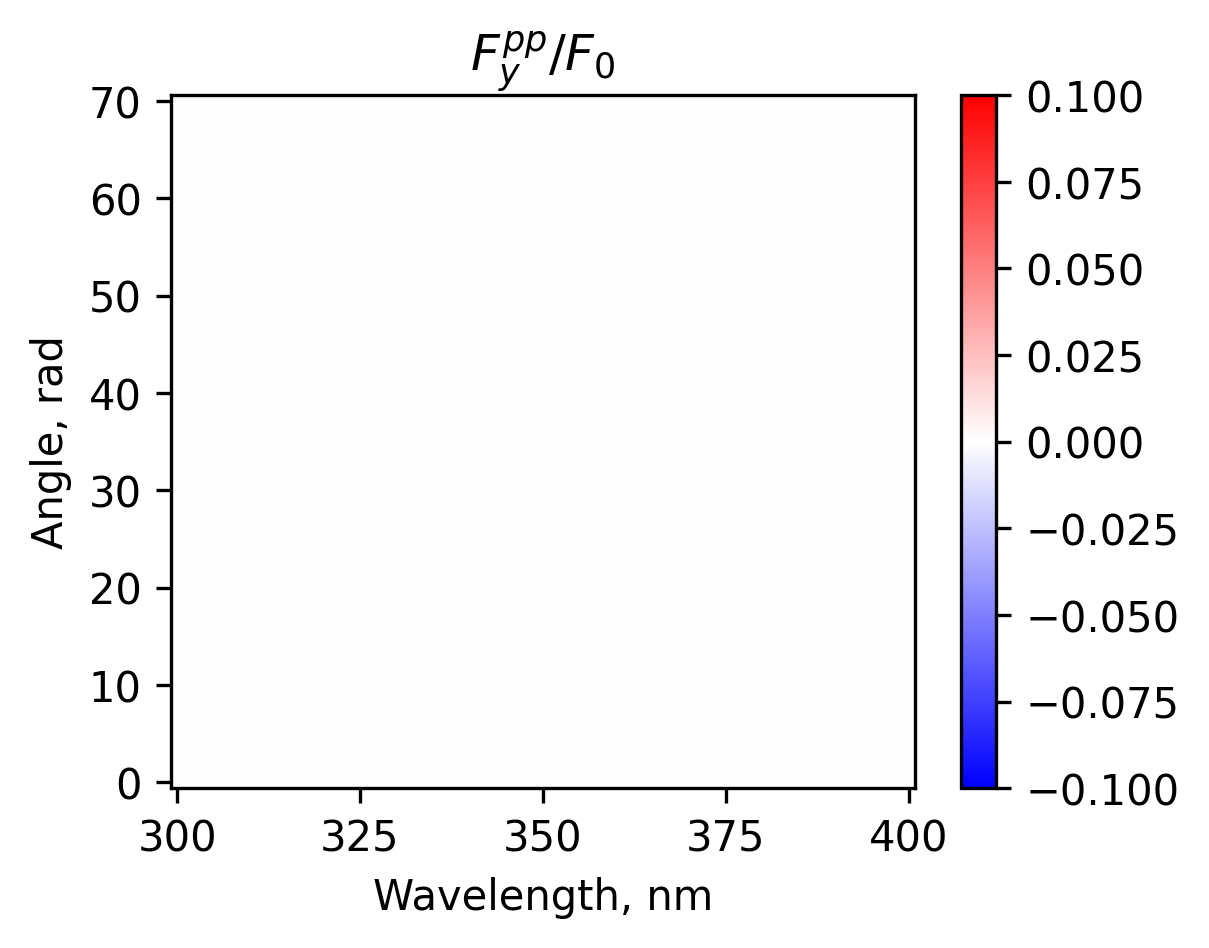

In [10]:
F_y_pp = F_y[:, :, 2]  
F_y_mm = F_y[:, :, 5]  
F_y_pm = F_y[:, :, 3]  
F_y_mp = F_y[:, :, 6]  
F_y_times = F_y[:, :, 7]

# Create a meshgrid for plotting
WLS, ANGLES = np.meshgrid(wls, angles, indexing='ij')  

# Plotting the heatmap
plt.figure(figsize=(4, 3), dpi=300)
contour = plt.pcolormesh(WLS, ANGLES*180/np.pi, (F_y_times)/fmax_wls, cmap='bwr')
#contour = plt.pcolormesh(WLS, ANGLES*180/np.pi, (F_x_pm+F_x_mp+F_x_times)/fmax_wls, cmap='bwr', vmax=0.01, vmin=-0.01)
#contour = plt.pcolormesh(WLS, ANGLES*180/np.pi, (F_x_e0)/fmax_wls, cmap='bwr')
plt.colorbar(contour)
plt.ylabel('Angle, rad')
plt.xlabel('Wavelength, nm')
plt.title(r'$F_y^{pp}/F_0$')

plt.show()

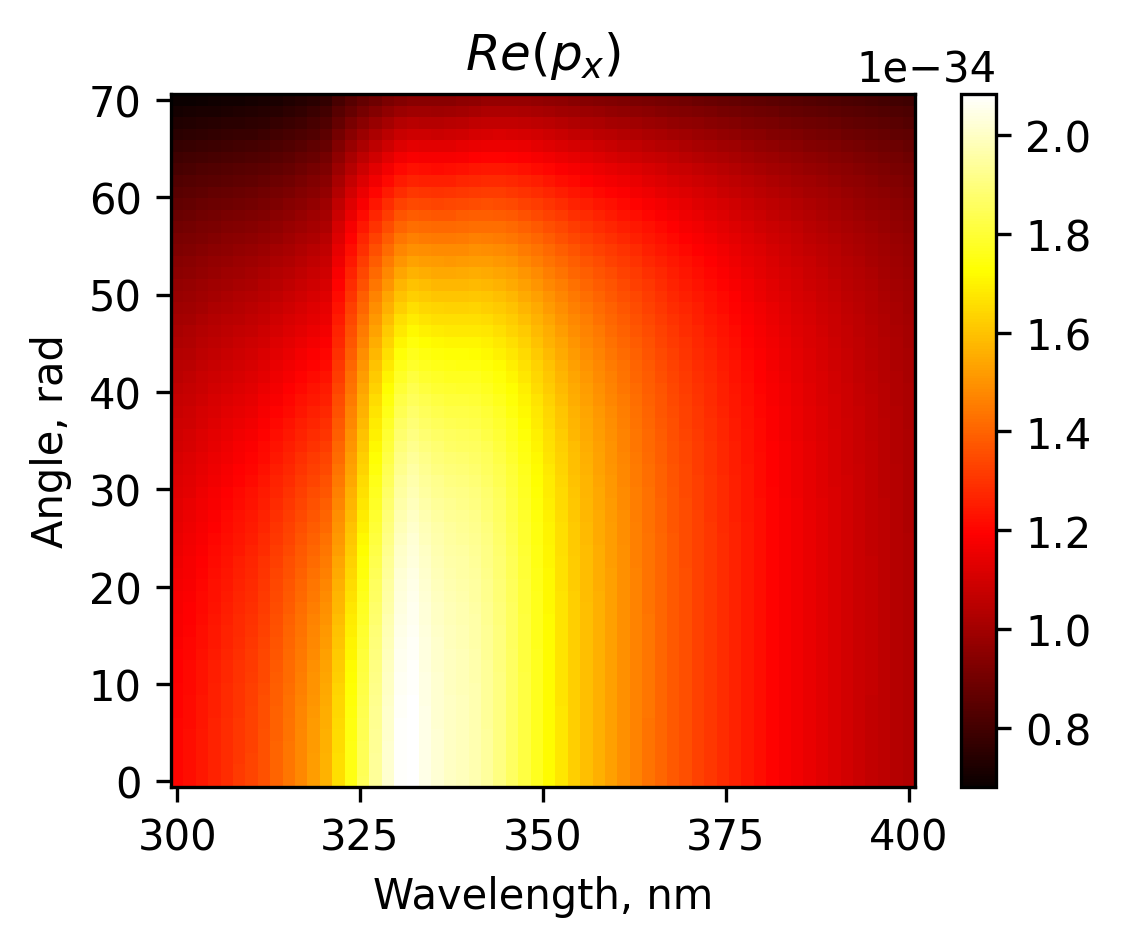

In [95]:
# Create a meshgrid for plotting
WLS, ANGLES = np.meshgrid(wls, angles, indexing='ij')  

# Plotting the heatmap
plt.figure(figsize=(4, 3), dpi=300)
contour = plt.pcolormesh(WLS, ANGLES*180/np.pi, P[:,:,0].real, cmap='hot')
plt.colorbar(contour)
plt.ylabel('Angle, rad')
plt.xlabel('Wavelength, nm')
plt.title(r'$Re(p_x)$')

plt.show()

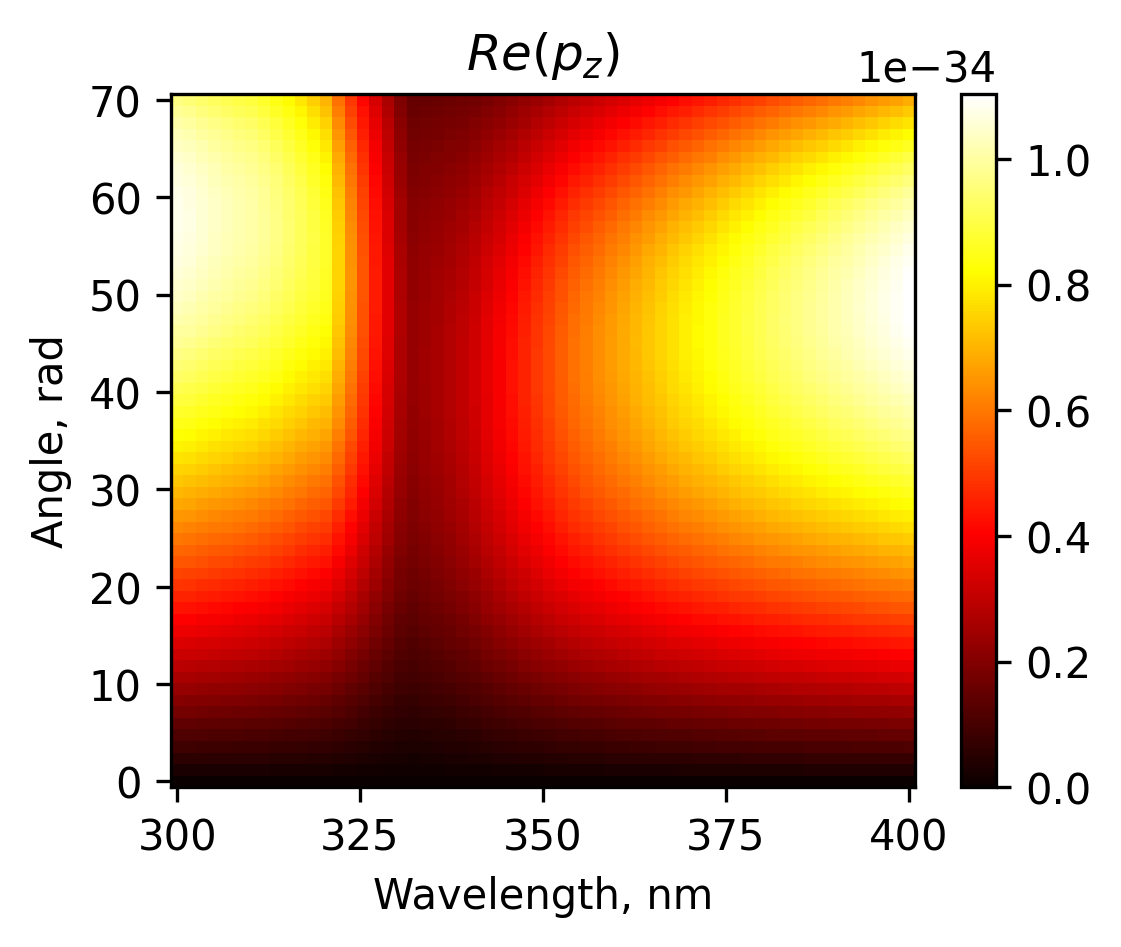

In [ ]:
# Create a meshgrid for plotting
WLS, ANGLES = np.meshgrid(wls, angles, indexing='ij')  

# Plotting the heatmap
plt.figure(figsize=(4, 3), dpi=300)
contour = plt.pcolormesh(WLS, ANGLES*180/np.pi, P[:,:,2].real, cmap='hot')
plt.colorbar(contour)
plt.ylabel('Angle, rad')
plt.xlabel('Wavelength, nm')
plt.title(r'$Re(p_z)$')

plt.show()

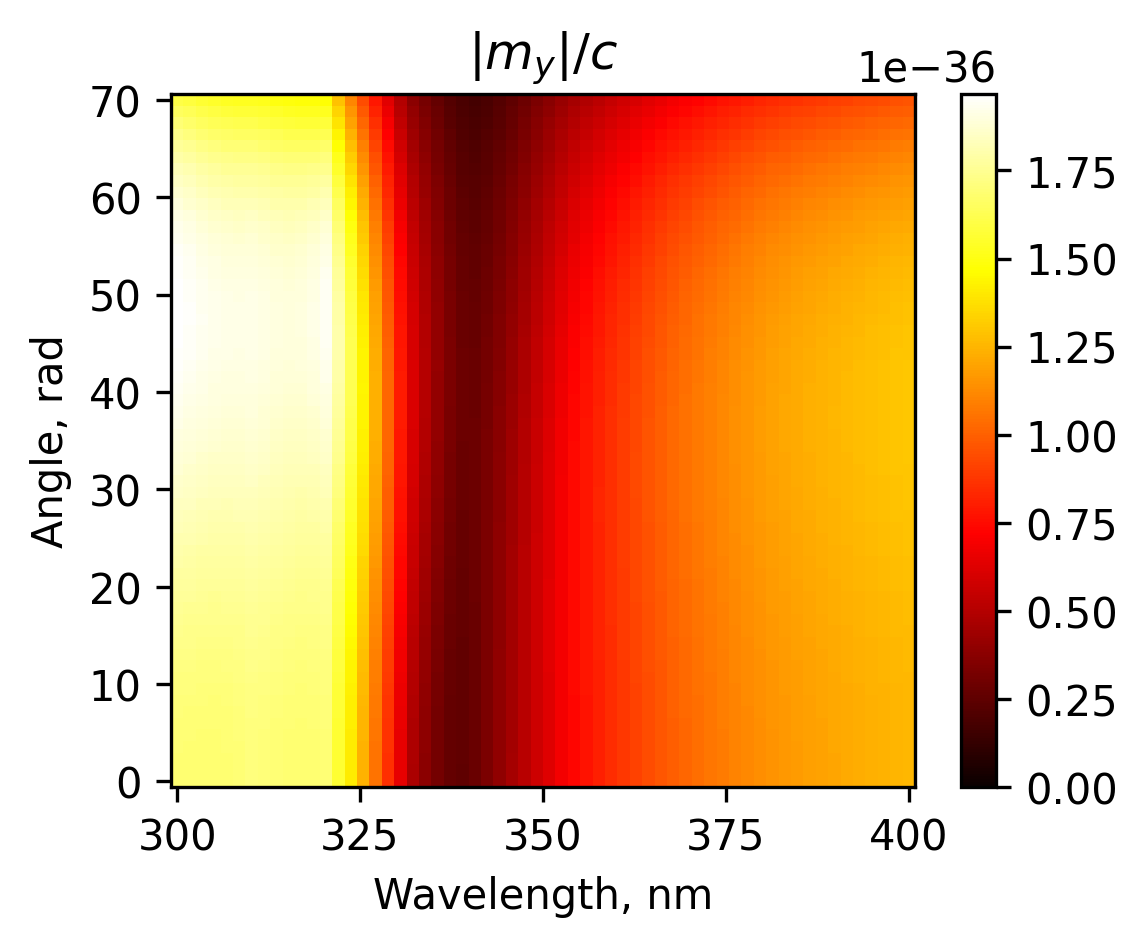

In [26]:
# Create a meshgrid for plotting
WLS, ANGLES = np.meshgrid(wls, angles, indexing='ij')  

# Plotting the heatmap
plt.figure(figsize=(4, 3), dpi=300)
contour = plt.pcolormesh(WLS, ANGLES*180/np.pi, np.abs(M[:,:,1])/c_const, cmap='hot', vmin=0)
plt.colorbar(contour)
plt.ylabel('Angle, rad')
plt.xlabel('Wavelength, nm')
plt.title(r'$|m_y|/c$')

plt.show()

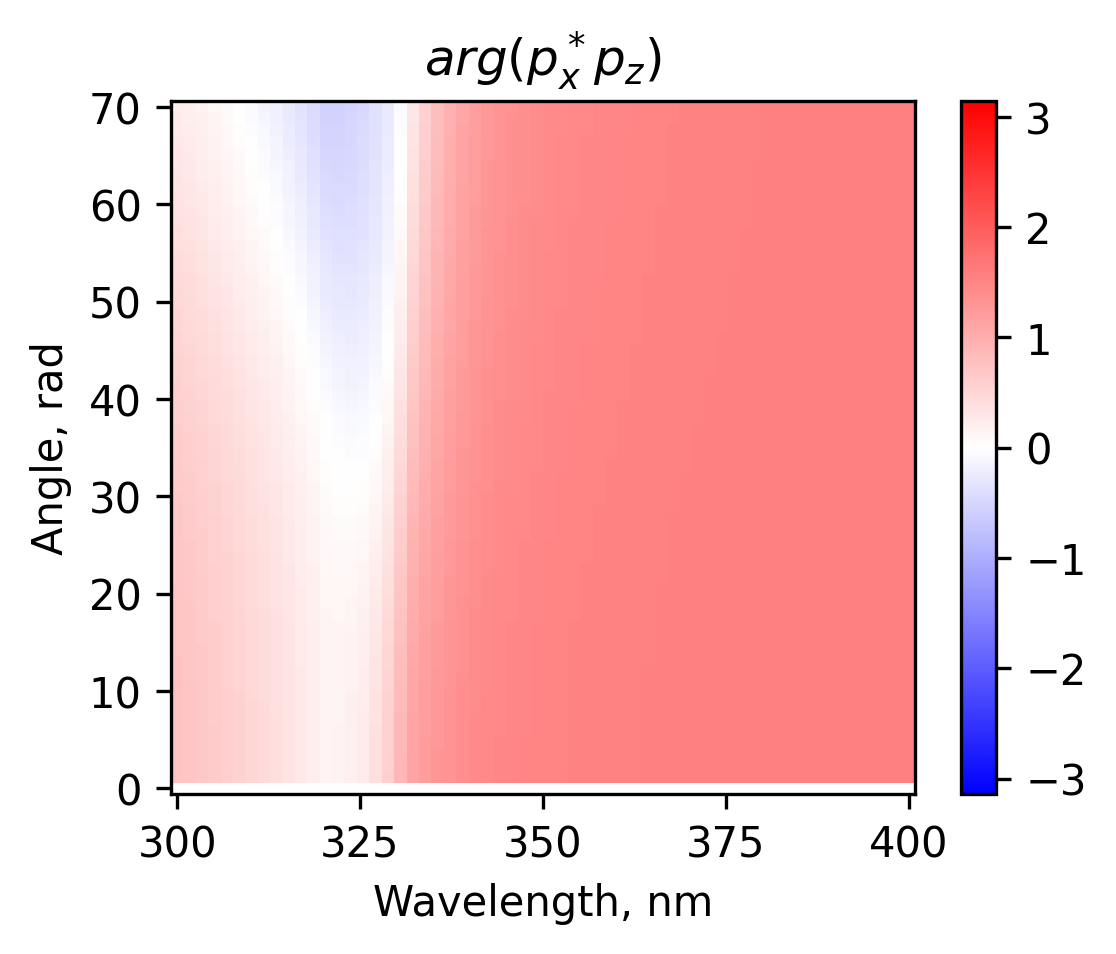

In [91]:
# Create a meshgrid for plotting
WLS, ANGLES = np.meshgrid(wls, angles, indexing='ij')  

# Plotting the heatmap
plt.figure(figsize=(4, 3), dpi=300)
contour = plt.pcolormesh(WLS, ANGLES*180/np.pi, np.angle(P[:,:,0].conj() * P[:,:,2]), cmap='bwr', vmin=-np.pi, vmax=np.pi)
plt.colorbar(contour)
plt.ylabel('Angle, rad')
plt.xlabel('Wavelength, nm')
plt.title(r'$arg(p_x^* p_z)$')

plt.show()

Text(0.5, 1.0, '$cos(arg(p_z^* m_y))$')

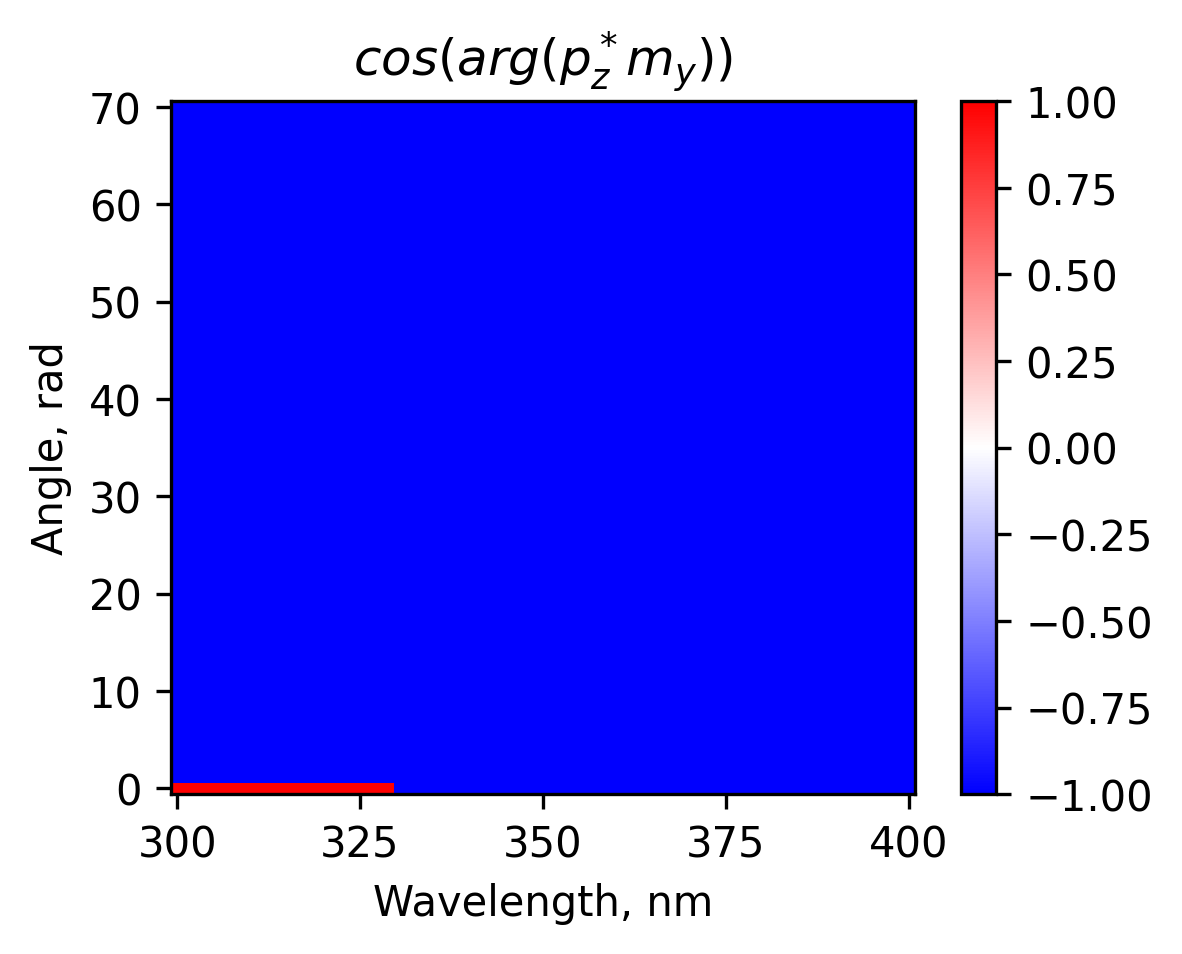

In [90]:
# Create a meshgrid for plotting
WLS, ANGLES = np.meshgrid(wls, angles, indexing='ij')  

# Plotting the heatmap
plt.figure(figsize=(4, 3), dpi=300)
contour = plt.pcolormesh(WLS, ANGLES*180/np.pi, np.cos(np.angle(P[:,:,2].conj() * M[:,:,1])), cmap='bwr', vmin=-1, vmax=1)
plt.colorbar(contour)
plt.ylabel('Angle, rad')
plt.xlabel('Wavelength, nm')
plt.title(r'$cos(arg(p_z^* m_y))$')

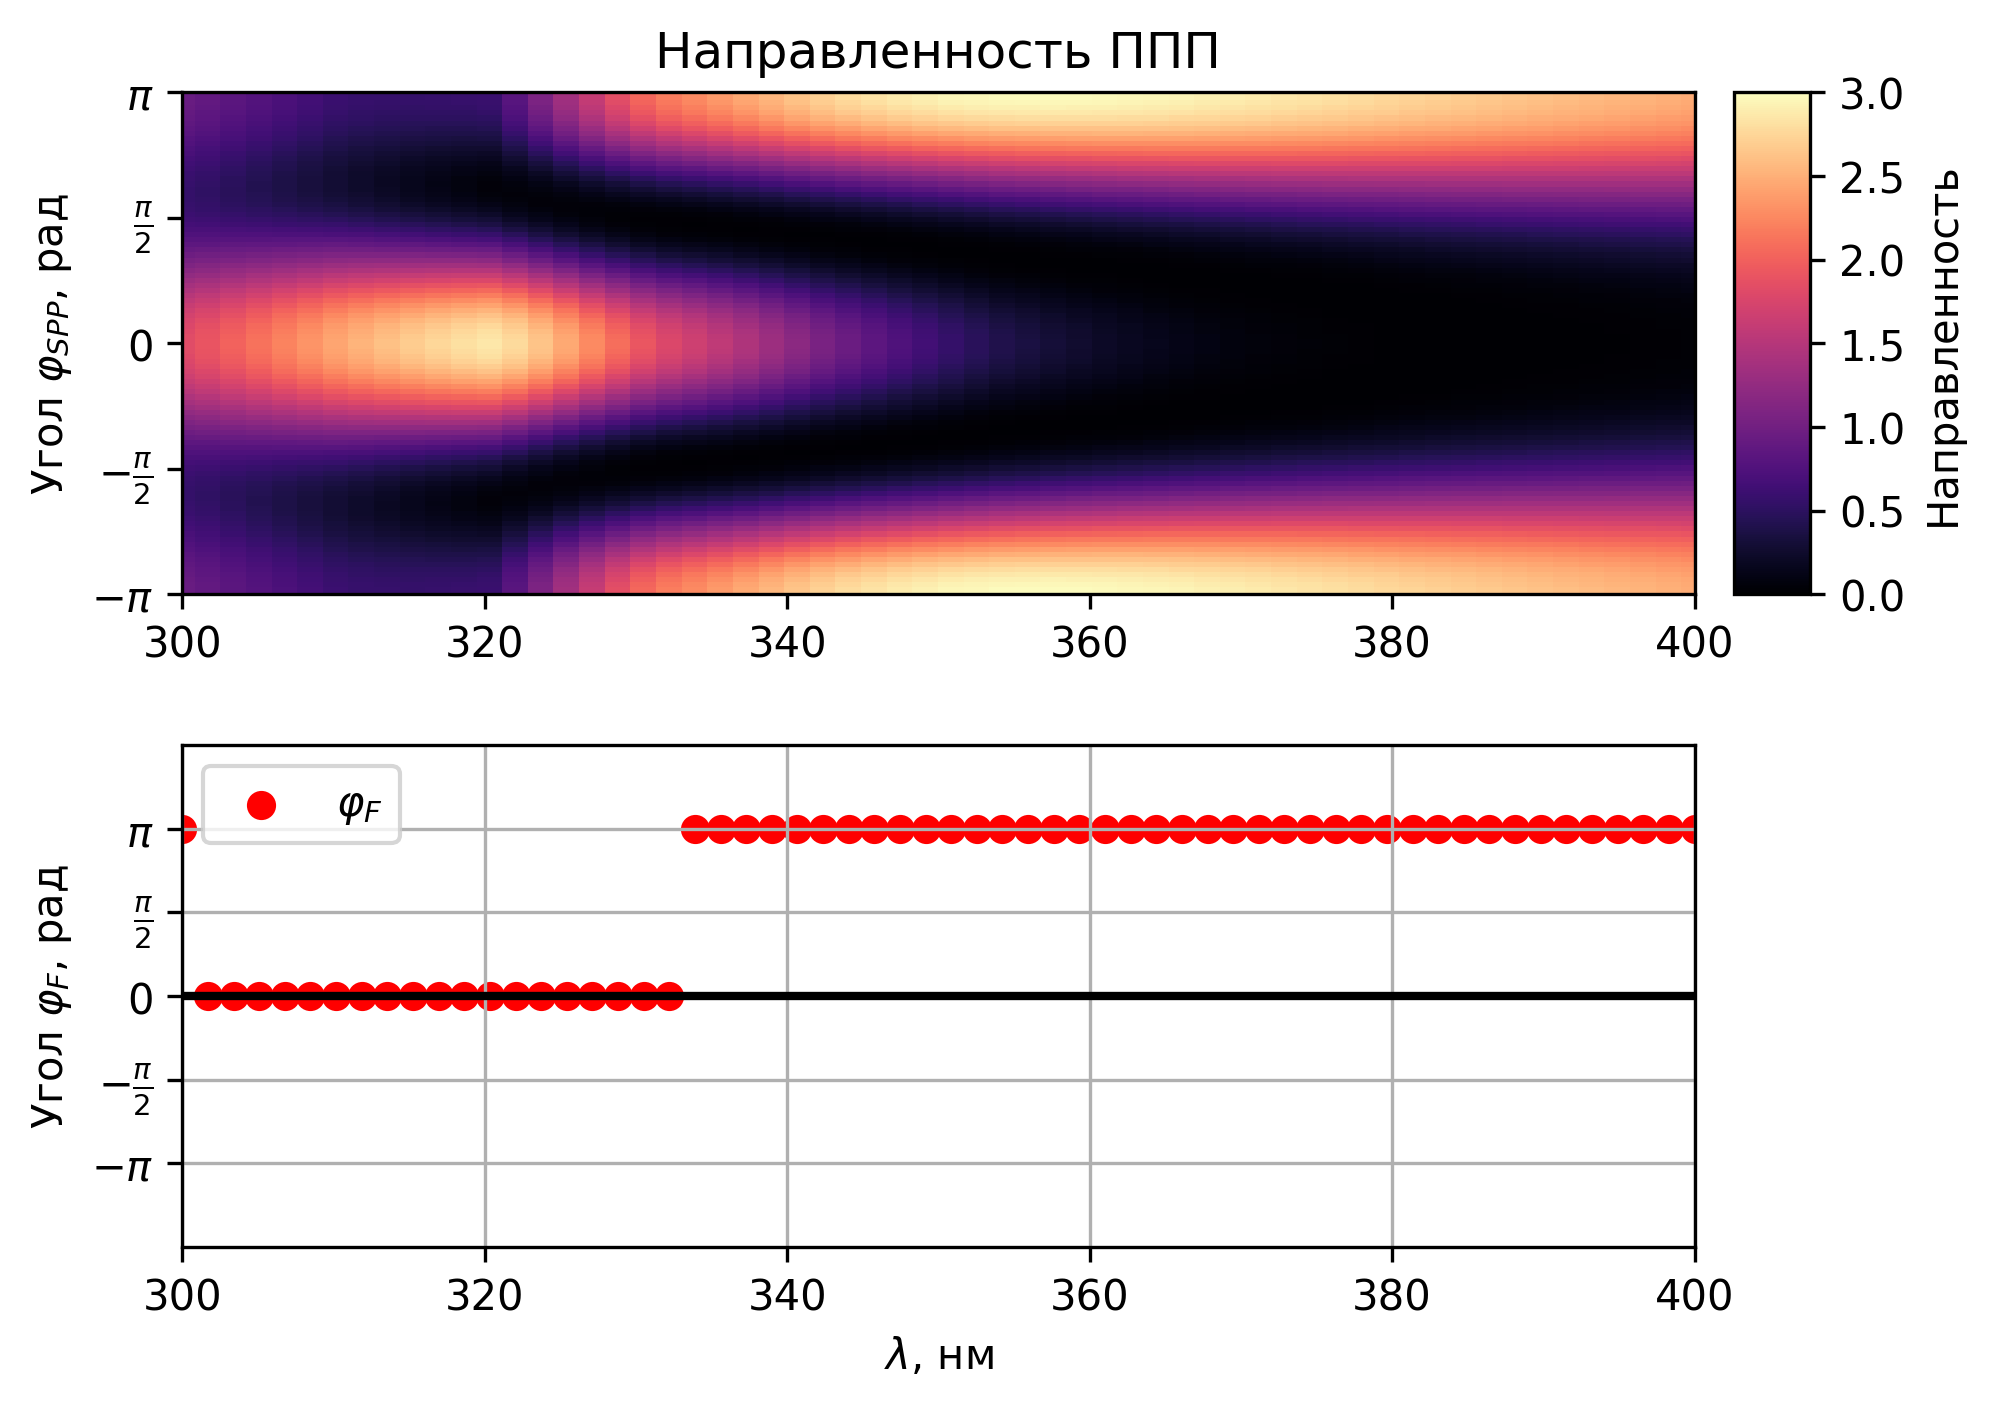

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

PHI = np.linspace(-np.pi, np.pi, 100)

ind = 29

directivityY = np.empty((len(PHI), len(wls)))
for wl_idx, wl in enumerate(wls):
    for angle_idx in range(len(PHI)):
        D = get_directivity(wl, P[wl_idx,ind,:], M[wl_idx,ind,:], eps_Ag)
        directivityY[angle_idx, wl_idx] = D(PHI[angle_idx])



# === Создание фигуры и макета ===
fig = plt.figure(figsize=(7, 5), dpi=300)
gs = gridspec.GridSpec(2, 2, width_ratios=[20, 1], height_ratios=[1, 1], hspace=0.3, wspace=0.05)

# === Верхний график (тепловая карта) ===
ax_top = fig.add_subplot(gs[0, 0])
directivity_map = ax_top.pcolor(wls, PHI, directivityY, cmap='magma', vmax=3, vmin=0)

# Настройка оси Y: метки углов в виде кратных π
# y_ticks = [0, np.pi/2, np.pi, np.pi*3/2, 2*np.pi]
# y_ticklabels = [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$']
y_ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
y_ticklabels = [r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$']
ax_top.set_yticks(y_ticks)
ax_top.set_yticklabels(y_ticklabels)

ax_top.set_ylim(-np.pi, np.pi)
ax_top.set_ylabel(r'Угол $\varphi_{SPP}$, рад')
ax_top.set_title('Направленность ППП')

# === Colorbar ===
cax = fig.add_subplot(gs[0, 1])
fig.colorbar(directivity_map, cax=cax, label='Направленность')

# === Нижний график (углы силы) ===
ax_bottom = fig.add_subplot(gs[1, 0], sharex=ax_top)

angles_no_sc= np.arctan2(F_y[:,ind,0], F_x[:,ind,0])

#angles_no_sc= np.unwrap(angles_no_sc)

# Отрисовка угла


# Границы и метки оси Y
y_ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
y_ticklabels = [r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$']
ax_bottom.set_yticks(y_ticks)
ax_bottom.set_yticklabels(y_ticklabels)
ax_bottom.axhline(0, color='black', linestyle='-', linewidth=2)
# closest_to_zero_idx = np.argmin(np.abs(angles_no_sc_from_R))
# approx_zero_crossing_x = Rs[closest_to_zero_idx]
# ax_bottom.axvline(approx_zero_crossing_x, color='black', linestyle='--', linewidth=2)
ax_bottom.scatter(wls, angles_no_sc, label=r'$\varphi_F$', color='r', linewidth=1)
ax_bottom.set_ylim(-9*np.pi/6, 9*np.pi/6)
ax_bottom.set_xlim(wls[0], wls[-1])
ax_bottom.set_xlabel('$\\lambda$, нм')
ax_bottom.set_ylabel(r'Угол $\varphi_F$, рад')
ax_bottom.grid(True)
ax_bottom.legend()
#plt.savefig(f'spp_vs_f_nosc_from_wl_z0_{point[2]}_R_{R}_phase_{phase}.png', dpi=300)



In [74]:
eps_Ag = frenel.get_interpolate('Ag')
eps_Si = 3 
R = 15
dist = 27 - R
a_angle = 0
phase = 0

point = [0,0,dist+R]
STOP=45

wls=np.arange(300,402,2)
angle = 35*np.pi/180

F_x_slice = np.empty((len(wls), 8))
F_y_slice = np.empty_like(F_x_slice)
F_z_slice = np.empty_like(F_x_slice)

P_slice,M_slice = np.empty((len(wls),3), dtype=complex),np.empty((len(wls),3), dtype=complex)



for i in tqdm(range(len(wls))):
        f =  force.F(wls[i], eps_Ag, point, R, eps_Si, angle,amplitude=1,phase=phase,a_angle=a_angle, stop=STOP, full_output=True)
        F_x_slice[i,:] = f[0]
        F_y_slice[i,:] = f[1]
        F_z_slice[i,:] = f[2]
        p,m = dipoles.calc_dipoles_v2(wls[i], eps_Ag, point, R, eps_Si, angle, amplitude=1, phase=phase, a_angle=a_angle, stop=STOP)

        p,m = p[:,0],m[:,0]
        P_slice[i,:],M_slice[i,:]=p,m


 12%|█▏        | 6/51 [00:12<01:37,  2.17s/it]c:\Users\borod\Desktop\SPP_ANALYTICAL\SPP_ANALYTICAL\.venv\Lib\site-packages\scipy\integrate\_quadpack_py.py:444: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  im_retval = quad(imfunc, a, b, args, full_output, epsabs,
 24%|██▎       | 12/51 [00:26<01:28,  2.27s/it]c:\Users\borod\Desktop\SPP_ANALYTICAL\SPP_ANALYTICAL\.venv\Lib\site-packages\scipy\integrate\_quadpack_py.py:441: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 51/51 [02:03<00:00,  2.42s/it]


In [75]:
dipoles_2d = np.loadtxt('dipoles_2d_ag.txt', skiprows=8, delimiter=',')
dipoles_3d = np.loadtxt('dipoles_3d_ag.txt', skiprows=8, delimiter=',')

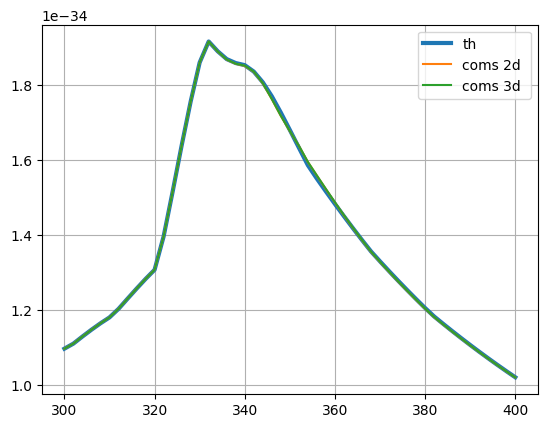

In [76]:
plt.plot(wls, P_slice[:,0].real, label='th', lw=3)
plt.plot(dipoles_2d[:,0], dipoles_2d[:,1], label='coms 2d ')
plt.plot(dipoles_3d[:,0], dipoles_3d[:,1], label='coms 3d ')
plt.legend()
plt.grid()

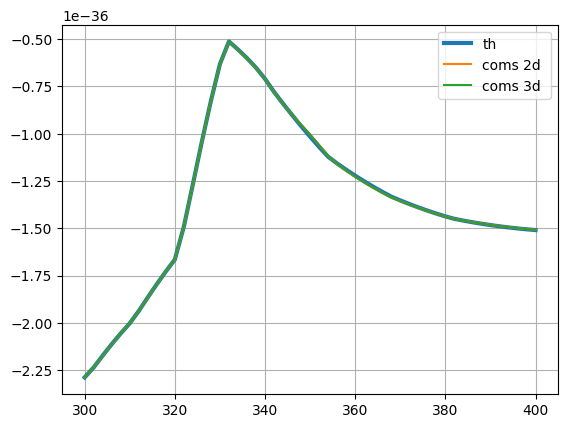

In [77]:
plt.plot(wls, M_slice[:,1].real/c_const, label='th', lw=3)
plt.plot(dipoles_2d[:,0], dipoles_2d[:,3], label='coms 2d ')
plt.plot(dipoles_3d[:,0], dipoles_3d[:,3], label='coms 3d ')
plt.legend()
plt.grid()

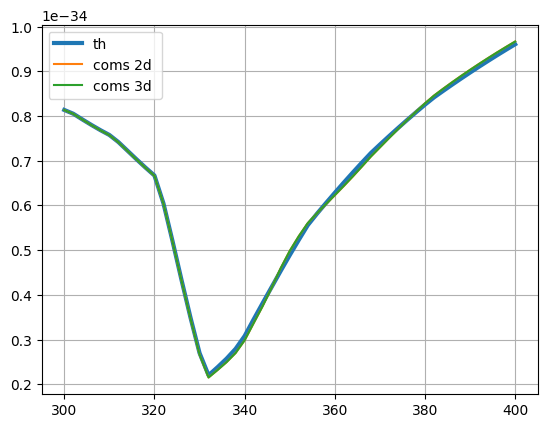

In [78]:
plt.plot(wls, P_slice[:,2].real, label='th', lw=3)
plt.plot(dipoles_2d[:,0], dipoles_2d[:,5], label='coms 2d ')
plt.plot(dipoles_3d[:,0], dipoles_3d[:,5], label='coms 3d ')
plt.legend()
plt.grid()

In [79]:
force_2d = np.loadtxt('force_2d_ag.txt', skiprows=8, delimiter=',')
force_3d = np.loadtxt('force_3d_ag.txt', skiprows=8, delimiter=',')


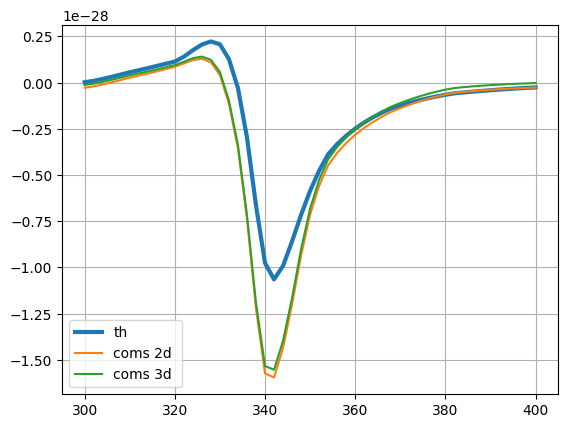

In [80]:
plt.plot(wls, F_x_slice[:,0], label='th', lw=3)
plt.plot(force_2d[:,0], force_2d[:,1], label='coms 2d ')
plt.plot(force_3d[:,0], force_3d[:,1], label='coms 3d ')
plt.legend()
plt.grid()

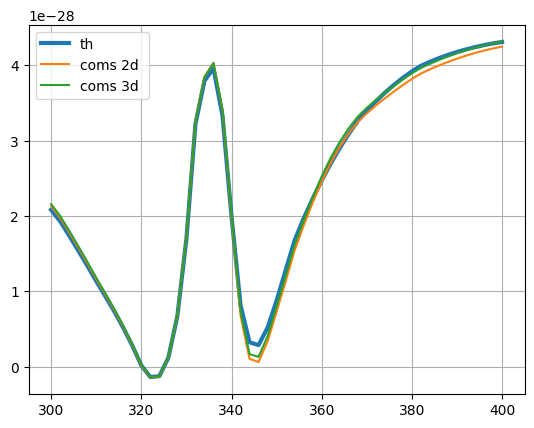

In [81]:
plt.plot(wls, F_z_slice[:,0], label='th', lw=3)
plt.plot(force_2d[:,0], force_2d[:,3], label='coms 2d ')
plt.plot(force_3d[:,0], force_3d[:,3], label='coms 3d ')
plt.legend()
plt.grid()

In [126]:
c_const = 299792458
eps0_const = 1/(4*np.pi*c_const**2)*1e7
mu0_const = 4*np.pi * 1e-7

k0 = lambda wl: 2*np.pi/wl/1e-9
omega = lambda wl: 2*np.pi*c_const/wl/1e-9


Gemxy = np.empty(len(wls), dtype=complex)
Gmmxx = np.empty(len(wls), dtype=complex)
Gmeyx = np.empty(len(wls), dtype=complex)
Geexx = np.empty(len(wls), dtype=complex)

def AlphaE(R, eps_Si):
    return lambda wl: dipoles.alpha_v2(wl, R, eps_Si)[0]
def AlphaH(R, eps_Si):
    return lambda wl: dipoles.alpha_v2(wl, R, eps_Si)[1]

AlphaEE = AlphaE(R, eps_Si)
AlphaHH = AlphaH(R, eps_Si)

E0x = np.empty(len(wls), dtype=complex)
H0y = np.empty(len(wls), dtype=complex)

for i in tqdm(range(len(wls))):
    GE, GH = green_func.green_ref_00(wls[i], point[2], eps_Ag, STOP)
    rotGE,rotGH = green_func.rot_green_ref_00(wls[i], point[2], eps_Ag, STOP)
    
    Geexx[i] = GE[0,0]*k0(wls[i])**2/eps0_const
    Gemxy[i] = 1j*omega(wls[i])*mu0_const*rotGH[0,1]
    Gmmxx[i] = k0(wls[i])**2*GH[0,0]
    Gmeyx[i] =  -1j*omega(wls[i]) * rotGE[1,0]
    
    E0, H0 = dipoles.initial_field(wls[i], angle, 1, eps_Ag, point, phase, a_angle)
    E0x[i] = E0[0]
    H0y[i] = H0[1] 

  0%|          | 0/51 [00:00<?, ?it/s]C:\Users\borod\AppData\Local\Temp\ipykernel_26516\4072035932.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  E0x[i] = E0[0]
C:\Users\borod\AppData\Local\Temp\ipykernel_26516\4072035932.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  H0y[i] = H0[1]
100%|██████████| 51/51 [00:00<00:00, 3187.68it/s]


In [90]:
Eeffx = (E0x+AlphaHH(wls)*Gemxy*H0y/(1-AlphaHH(wls)*Gmmxx)) / (1 - AlphaEE(wls)*eps0_const*Geexx - AlphaEE(wls)*eps0_const*AlphaHH(wls)*Gemxy*Gmeyx/(1-AlphaHH(wls)*Gmmxx))
px = AlphaEE(wls)*eps0_const*Eeffx

In [6]:
pxpz = np.loadtxt('pxpz_ag_x_check.txt', skiprows=8, delimiter=',')

In [24]:
dipoles.initial_field(300,35,1,1,[0,0,0],0,0)[0]

array([[-0.90369221+0.j],
       [ 0.        +0.j],
       [-0.42818267+0.j]])

In [171]:
wls=np.arange(300,402,2)

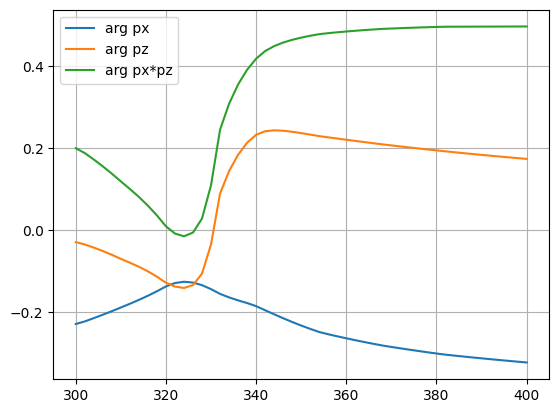

In [176]:
plt.plot(wls, np.angle(P_slice[:,0])/np.pi, label='arg px')
plt.plot(wls, np.angle(P_slice[:,2])/np.pi, label='arg pz')
plt.plot(wls, np.angle(P_slice[:,0].conj()*P_slice[:,2])/np.pi, label='arg px*pz')
#plt.plot(wls, px.real, label='scalar')
#plt.plot(pxpz[:,0], -pxpz[:,3]/np.sqrt(2)/8, label='comsol')
plt.grid()
plt.legend()

In [129]:
fx_check = np.loadtxt('force_ag_x_check.txt', skiprows=8, delimiter=',')

In [134]:
np.pi

3.141592653589793

In [ ]:
np.sqrt(2)*2


np.float64(2.8284271247461903)

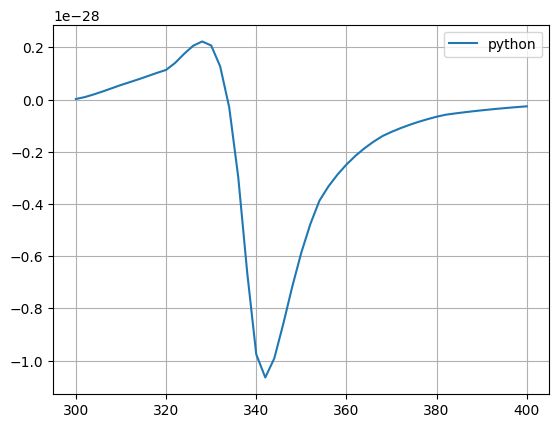

In [130]:
plt.plot(wls, (F_x_slice[:,0]), label='python')
#plt.plot(fx_check[:,0], fx_check[:,1], label='comsol')
plt.grid()
plt.legend()

# Проверим TE часть


In [158]:
from MieSppForce import  green_func, frenel, dipoles, force
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.integrate import quad

In [ ]:
c_const = 299792458
eps0_const = 1/(4*np.pi*c_const**2)*1e7
mu0_const = 4*np.pi * 1e-7

In [181]:
eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')
#eps_Ag = frenel.get_interpolate('Ag')

#eps_Si = 3
R = 295/2
dist = 4
a_angle =0
phase = 0
angle = 25*np.pi/180

point = [0,0,dist+R]

In [182]:

STOP=45

#wls=np.linspace(800,1100,60)
wl=800
a_angles = np.linspace(0, np.pi/2, 100)


F_x = np.empty((len(a_angles), 8))
F_y = np.empty_like(F_x)
F_z = np.empty_like(F_x)

P,M = np.empty((len(a_angles),3), dtype=complex),np.empty((len(a_angles),3), dtype=complex)


for i in tqdm(range(len(a_angles))):
    f =  force.F(wl, eps_Au, point, R, eps_Si, angle,amplitude=1,phase=phase,a_angle=a_angles[i], stop=STOP, full_output=True)
    F_x[i,:] = f[0]
    F_y[i,:] = f[1]
    F_z[i,:] = f[2]
    p,m = dipoles.calc_dipoles_v2(wl, eps_Au, point, R, eps_Si, angle, amplitude=1, phase=phase, a_angle=a_angles[i], stop=STOP)
    p,m = p[:,0],m[:,0]
    P[i,:],M[i,:]=p,m


100%|██████████| 100/100 [00:02<00:00, 39.67it/s]


In [183]:

PHI = np.linspace(-np.pi, np.pi,60)
directivity = np.empty((len(a_angles),len(PHI)))

for i in tqdm(range(len(a_angles))):
    D = get_directivity(wl, P[i,:], M[i,:], eps_Au)
    for j in range(len(PHI)):
        directivity[i,j] = D(PHI[j])

100%|██████████| 100/100 [00:01<00:00, 87.36it/s]


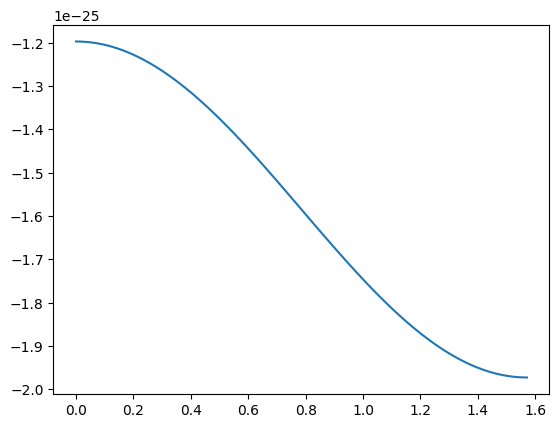

In [206]:
plt.plot(a_angles, F_x[:,0]-F_x[:,1]-F_x[:,4])

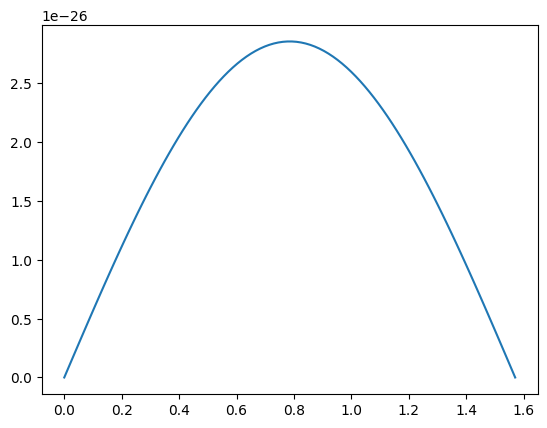

In [207]:
plt.plot(a_angles, F_y[:,0])

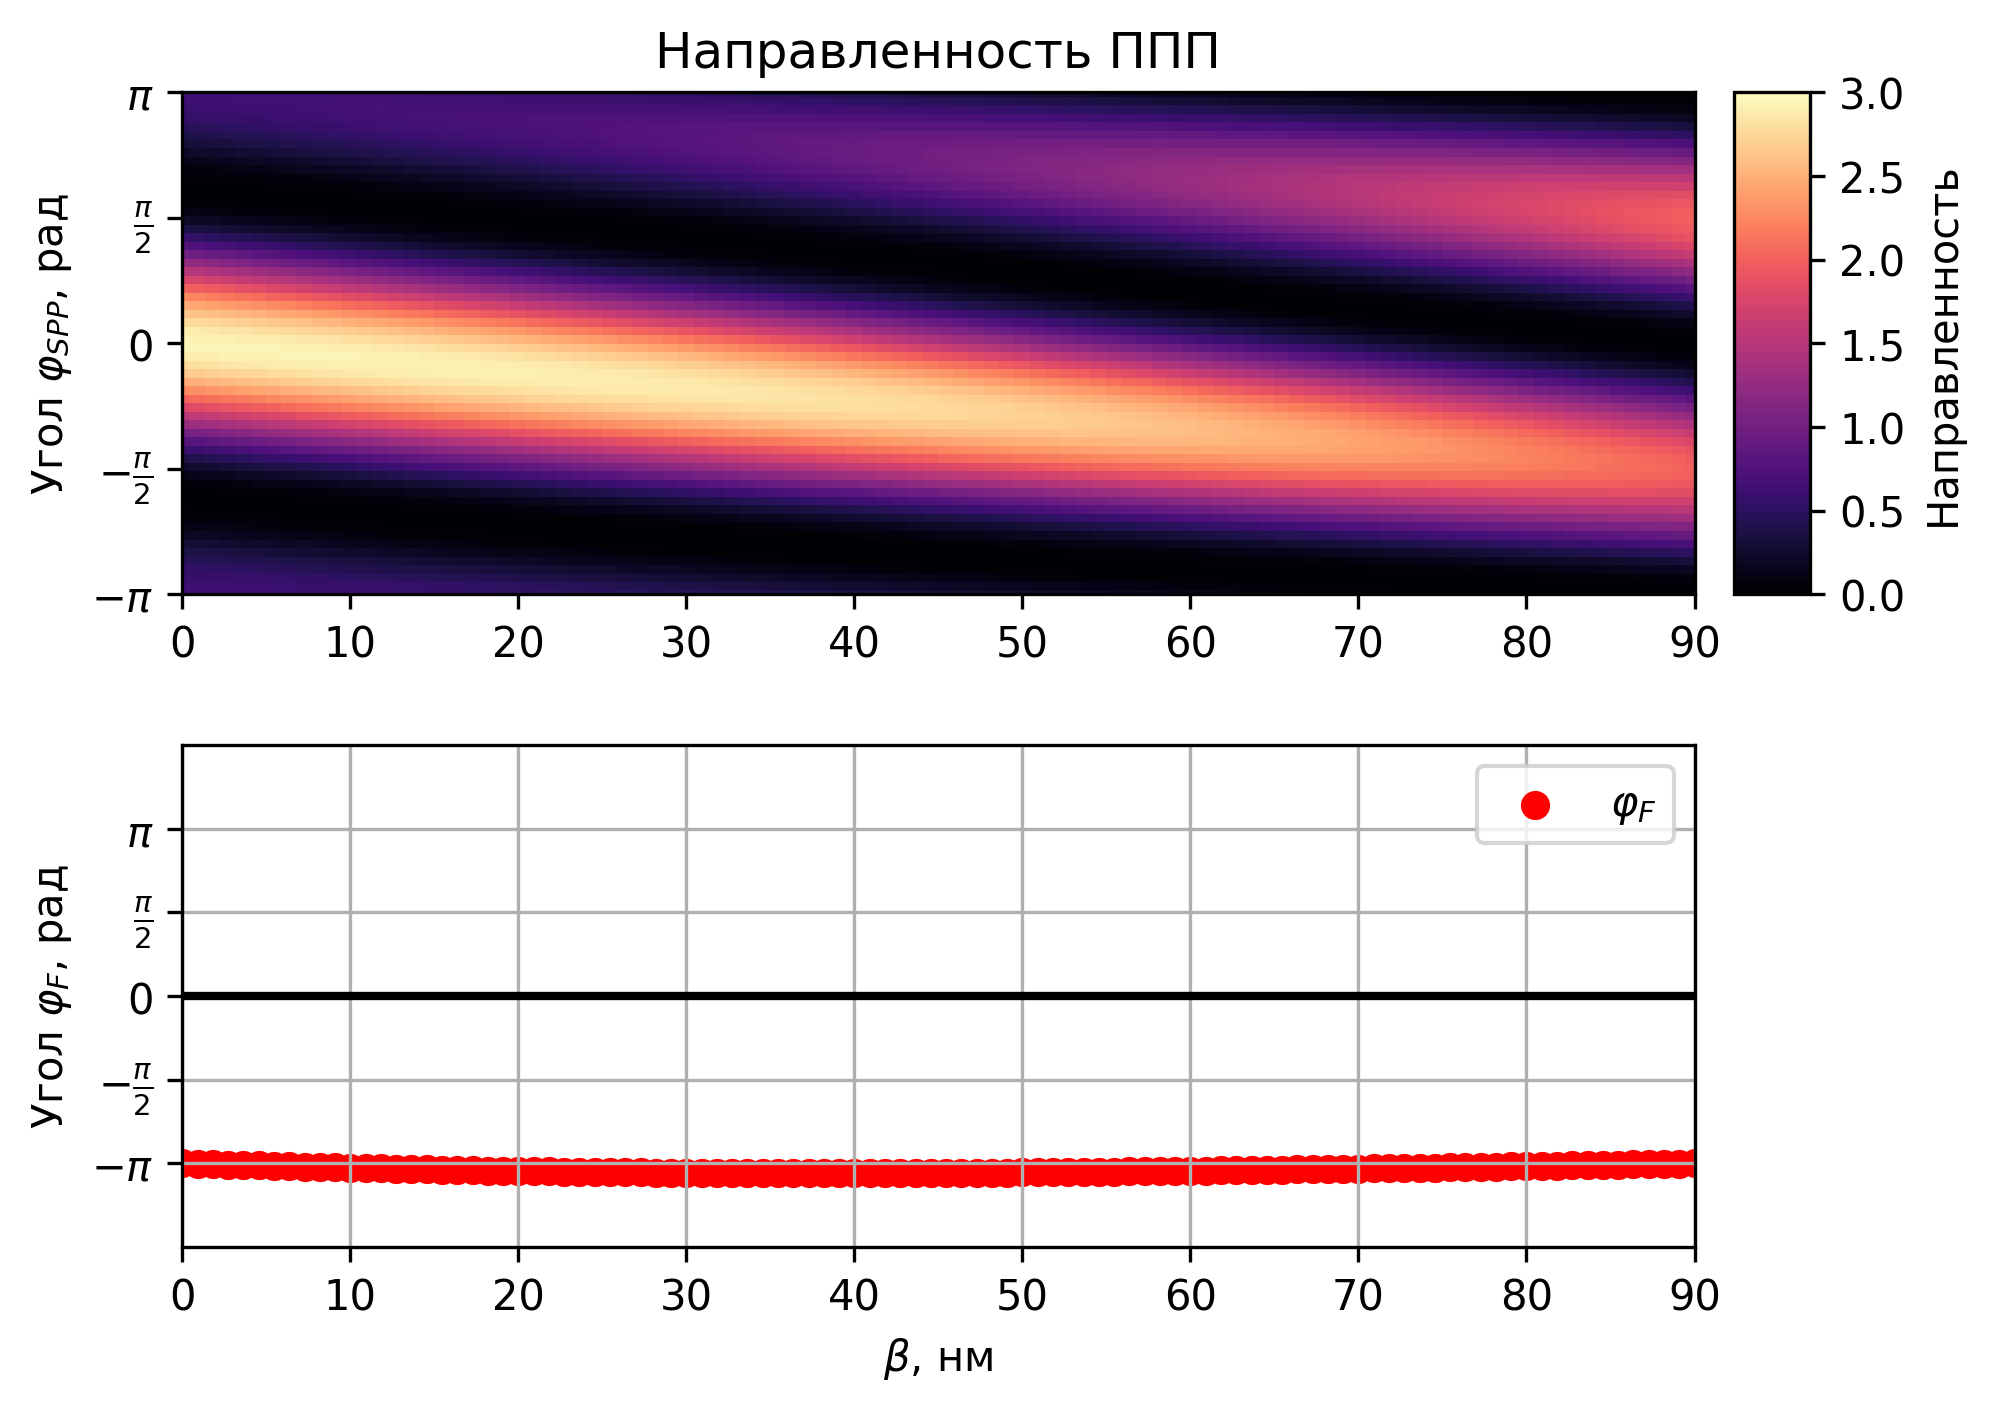

In [221]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np


# === Создание фигуры и макета ===
fig = plt.figure(figsize=(7, 5), dpi=300)
gs = gridspec.GridSpec(2, 2, width_ratios=[20, 1], height_ratios=[1, 1], hspace=0.3, wspace=0.05)

# # === Верхний график (тепловая карта) ===
ax_top = fig.add_subplot(gs[0, 0])
directivity_map = ax_top.pcolor( a_angles*180/np.pi, PHI, directivity.T, cmap='magma', vmax=3, vmin=0)

# Настройка оси Y: метки углов в виде кратных π
y_ticks = [0, np.pi/2, np.pi, np.pi*3/2, 2*np.pi]
y_ticklabels = [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$']
y_ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
y_ticklabels = [r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$']
ax_top.set_yticks(y_ticks)
ax_top.set_yticklabels(y_ticklabels)

ax_top.set_ylim(-np.pi, np.pi)
ax_top.set_ylabel(r'Угол $\varphi_{SPP}$, рад')
ax_top.set_title('Направленность ППП')

# # === Colorbar ===
cax = fig.add_subplot(gs[0, 1])
fig.colorbar(directivity_map, cax=cax, label='Направленность')

# # === Нижний график (углы силы) ===
ax_bottom = fig.add_subplot(gs[1, 0], sharex=ax_top)

angles_no_sc= np.arctan2(F_y[:, 0], F_x[:, 0] - F_x[:, 1]-F_x[:,4])

angles_only_fpp = np.arctan2(F_y[:, 2], F_x[:, 2])
angles_no_sc= np.unwrap(angles_no_sc)

# # Отрисовка угла


# # Границы и метки оси Y
y_ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
y_ticklabels = [r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$']
ax_bottom.set_yticks(y_ticks)
ax_bottom.set_yticklabels(y_ticklabels)
ax_bottom.axhline(0, color='black', linestyle='-', linewidth=2)
# closest_to_zero_idx = np.argmin(np.abs(angles_no_sc_from_R))
# approx_zero_crossing_x = Rs[closest_to_zero_idx]
# ax_bottom.axvline(approx_zero_crossing_x, color='black', linestyle='--', linewidth=2)
ax_bottom.scatter(a_angles*180/np.pi, angles_no_sc-2*np.pi, label=r'$\varphi_F$', color='r', linewidth=1)
ax_bottom.set_ylim(-9*np.pi/6, 9*np.pi/6)
ax_bottom.set_xlim(a_angles[0]*180/np.pi, a_angles[-1]*180/np.pi)
ax_bottom.set_xlabel('$\\beta$, нм')
ax_bottom.set_ylabel(r'Угол $\varphi_F$, рад')
ax_bottom.grid(True)
ax_bottom.legend()
#plt.savefig(f'spp_vs_f_nosc_from_wl_z0_{point[2]}_R_{R}_phase_{round(phase,2)}_beta_{round(a_angle,2)}.png', dpi=300)



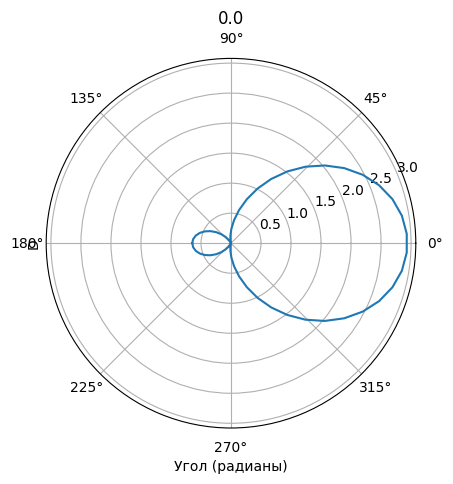

In [218]:
ind = 0

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(PHI, directivity[ind,:])
ax.grid(True)
plt.title(round(a_angles[ind],1))
plt.xlabel("Угол (радианы)")
plt.ylabel("D")
plt.show()